# Used car Price Prediction using Machine Learning
In this notebook we have tried to make a Machine Learning model which will help us to predict the prices of cars.

We have used a dataset from kaggle which has the follwing columns.


1.   Name: Name of the car model along with brand name.
2.   Location: Location where the car is listed and registered from.
3.   Year: The year the car is being used and first bought from manufacturer.
4.   Kilometers_Driven: The Number of Kilometer the car has covered till now.
5.   Fuel_Type: The Type of Fuel which the engine runs on.
6.   Transmission: Whether the car transmission is Automatic or Manual.
7.   Owner_type: Ownership type which means the number of times it has been under diffrent ownership.
8.   Mileage: The capacity of car to run in a litre or kilogram of fuel.
9.   Engine: The Engine capacity the manufacturer has given for the users.
10.  Power: The capacity of engine to give ouput in form of HorsePower.
11.  Seats: The number of people a car can accomodate comfortably.
12.  New_Price: The price of the same model if we look to buy brand new from manufacturer.
13.  Price: The price it has been listed on the market of used cars.

Let's Move ahead and start working upon building the model



Importing Imoprtant libariries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
import re

Importing the Dataset to work upon.

In [4]:
df=pd.read_csv('/content/train-data.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Checking the dataset for basic informations.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [8]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
df.shape

(6019, 13)

In [10]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

# Data Prepration

Extracting Brand Name

In [11]:
df['Brand']=df['Name'].apply(lambda x:x.split()[0])

Fixing Mileage

In [12]:
df['Mileage'] =df['Mileage'].str.rstrip('kmpl')
df['Mileage'] =df['Mileage'].str.rstrip('km/g')
df[df['Mileage']==0.00]=np.nan
df[df['Mileage']==0.0]=np.nan

In [13]:
df['Mileage']=df['Mileage'].astype(float)

In [14]:
df['Mileage'] = df.groupby(['Brand', 'Year'])['Mileage'].transform(lambda x: x.fillna(x.mean()))

In [15]:
df['Mileage'].isna().sum()

0

In [16]:
df['Mileage']=df['Mileage'].transform(lambda x:x.fillna(x.median))

In [17]:
df['Mileage'].isna().sum()

0

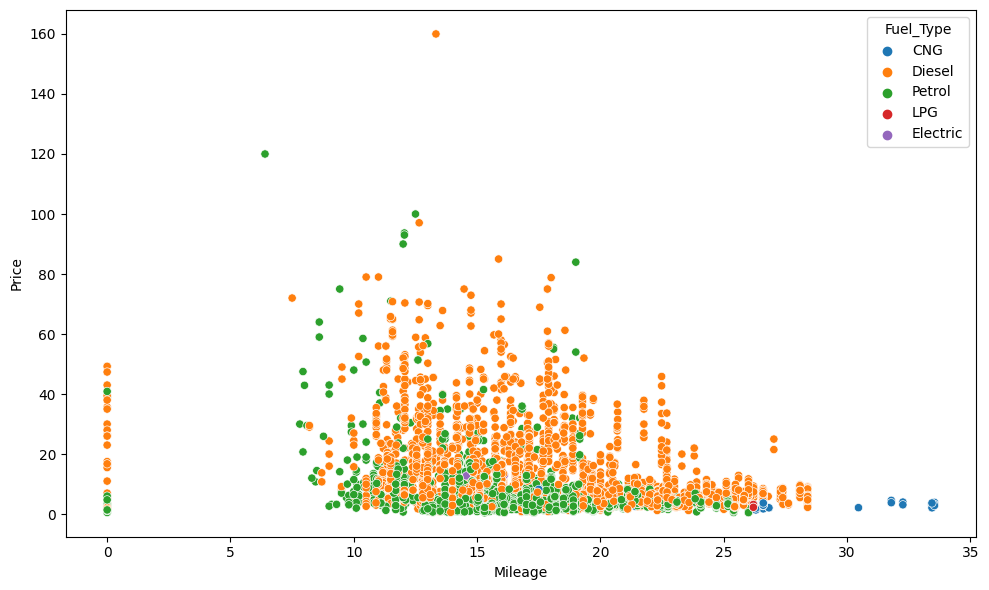

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Mileage'],y=df['Price'],hue=df['Fuel_Type'])
plt.tight_layout()

Fixing Engine Values

In [19]:
df['Engine']=df['Engine'].str.rstrip('CC')

In [20]:
df['Engine']=df['Engine'].replace(regex="null",value= np.nan)

In [21]:
df['Engine']=df['Engine'].astype(float)

In [22]:
df['Engine']=df.groupby('Brand')['Engine'].transform(lambda x:x.fillna(x.mean()))


In [23]:
df['Engine'].isna().sum()

0

In [24]:
df['Engine']=df['Engine'].transform(lambda x:x.fillna(x.median))

In [25]:
df['Engine']=df.groupby(['Brand','Year'])['Engine'].transform(lambda x:x.fillna(x.mean()))


<Axes: xlabel='Price', ylabel='Engine'>

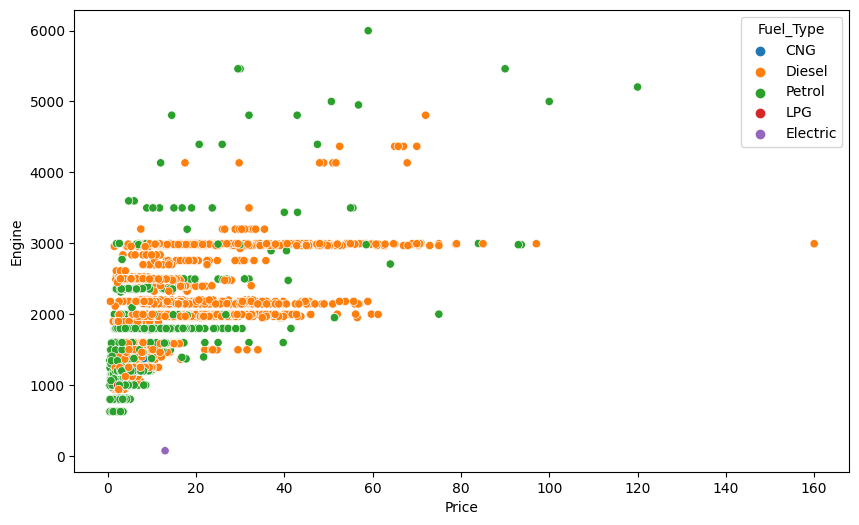

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Price'],y=df['Engine'],hue=df['Fuel_Type'])

Fixing Power Values

In [27]:
df['Power']=df['Power'].str.rstrip('bhp')

In [28]:
# There are values which are null in Power column
# We will replace those with NAN so that can be handlied while treating missing values

df['Power']=df['Power'].replace(regex="null", value = np.nan)
df['Power']=df['Power'].astype(float)


In [29]:
df['Power'].isna().sum()

143

In [30]:
df['Power']=df.groupby(['Brand','Year'])['Power'].transform(lambda x:x.fillna(x.mean()))


In [31]:
df['Power'].isna().sum()

16

In [32]:
df['Power']=df.groupby('Brand')['Power'].transform(lambda x:x.fillna(x.mean()))


In [33]:
df['Power'].isna().sum()

1

In [34]:
df['Power']=df['Power'].transform(lambda x:x.fillna(x.mean()))


In [35]:
df['Power'].isna().sum()

0

Removing Unwanted strings from New_price Column

In [36]:
New_Price_Lakhs = []

# Regex for numeric + " " + "Lakh"  format
regex_lakh = "^\d+(\.\d+)? Lakh$"
for value in df["New_Price"]:
    if isinstance(value, str):
        if re.match(regex_lakh, value):
            New_Price_Lakhs.append(float(value.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            New_Price_Lakhs.append(float(value.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        New_Price_Lakhs.append(np.nan)

In [37]:
df['New_Price']=New_Price_Lakhs

Extracting Age of Car

In [38]:
df['Car Age']=2023-df['Year']
df['Car Age']=df['Car Age'].astype(int)

Text(0.5, 1.0, 'Distrubution of car with diffrent age')

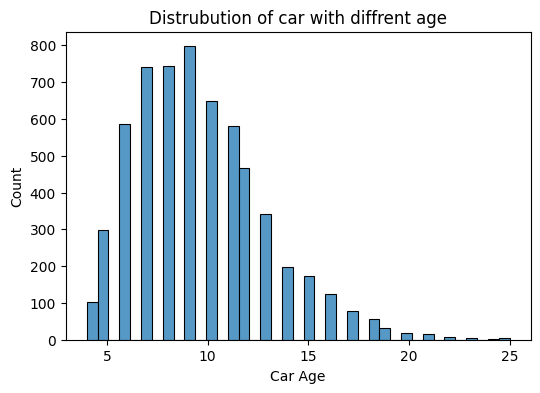

In [178]:
plt.figure(figsize=(6,4))
sns.histplot(df['Car Age'])
plt.title('Distrubution of car with diffrent age')

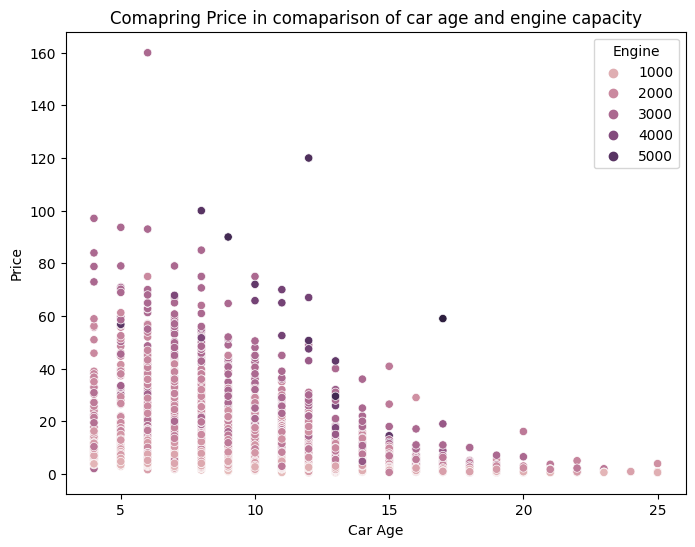

In [179]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Car Age'],y=df['Price'],hue=df['Engine'])
plt.title('Comapring Price in comaparison of car age and engine capacity')
plt.show()

Categorizing Brands

In [41]:
Low_value = ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Tata', 'Mitsubishi', 'Renault', 'Mahindra', 'Ford',
             'Datsun', 'Chevrolet', 'Skoda', 'Fiat', 'Smart', 'Ambassador', 'Isuzu', 'Force']
High_value = ['Audi', 'Nissan', 'Volkswagen', 'Land Rover', 'Mercedes-Benz', 'BMW', 'Porsche',
              'Jaguar', 'Volvo', 'Mini Cooper','Jeep', 'Bentley', 'Lamborghini']


In [42]:
df['Brand Type']=df['Brand'].apply(lambda x:'Low Value' if x in Low_value else 'High Value')

Fixing Seat Values

In [43]:
df['Seats'].isna().sum()

42

In [44]:
df[df['Brand Type']=='Low Value']['Seats'].isna().sum()

34

In [45]:
df['Seats']=df.groupby('Brand Type')['Seats'].transform(lambda x:x.fillna(x.mean()))

In [46]:
df['Seats'].isna().sum()

0

In [47]:
df['Seats']=df['Seats'].replace(regex='null',value=np.nan)

Plotting null values againts all the column.

<Axes: >

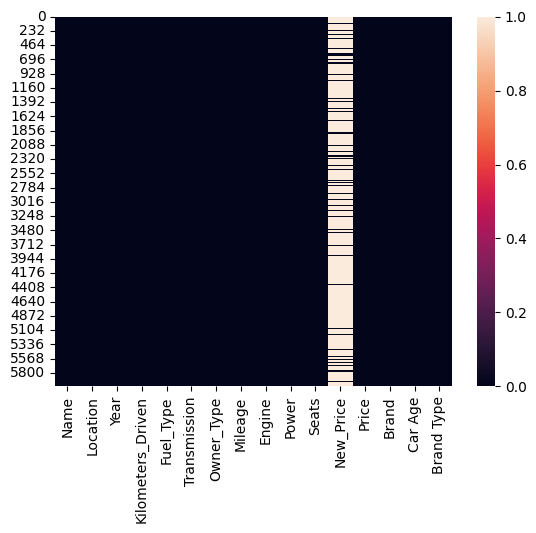

In [49]:
sns.heatmap(df.isna())

As majority of New Price is empty.
It would contribute very less to our model

In [50]:
df=df.drop('New_Price',axis=1)

Plotting Chart to check out columns that are corelated to price.

<ipython-input-51-fd72fdaf9d47>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Price']).plot(kind='bar',color='red',figsize=(8,4))


<Axes: >

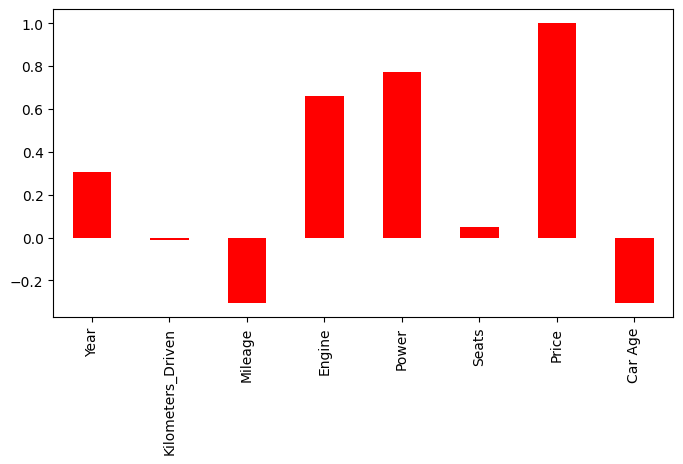

In [51]:
df.corrwith(df['Price']).plot(kind='bar',color='red',figsize=(8,4))

Deleting Unwanted Columns

In [52]:
df=df.drop(['Name','Year'],axis=1)

In [53]:
df.dtypes

Location              object
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Car Age                int64
Brand Type            object
dtype: object

Fixing Brand Names values.

In [54]:
df['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [55]:
df['Brand']=df['Brand'].replace(['Mini','Land','ISUZU'],['Mini Cooper','Land Rover','Isuzu'])

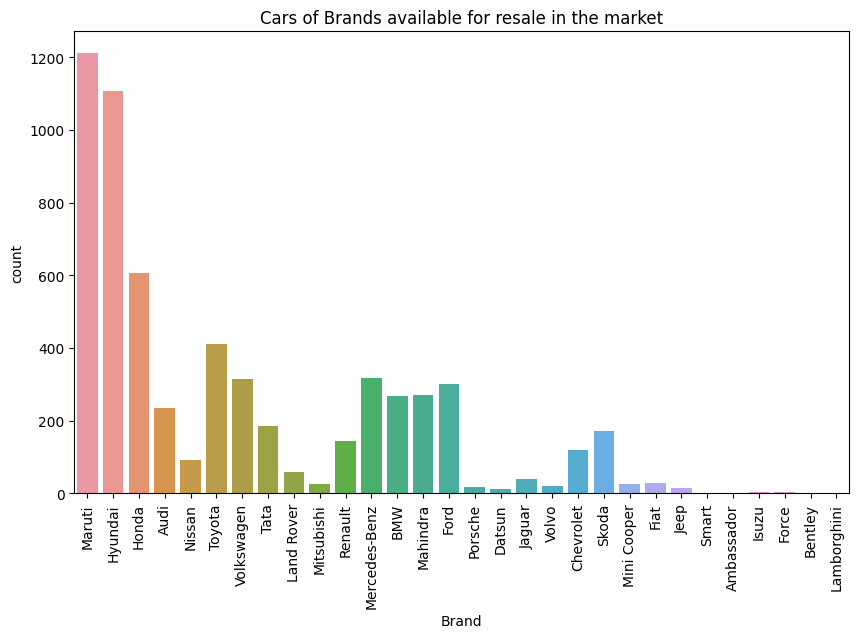

In [180]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Brand'])
plt.xticks(rotation=90)
plt.title('Cars of Brands available for resale in the market')
plt.show()

Checking Outliers

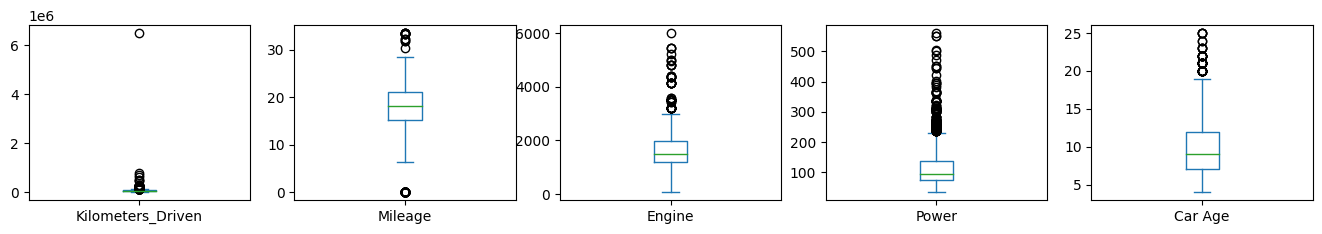

In [57]:
df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car Age']].plot(kind = 'box',subplots = True, layout = (2,6), figsize = (20,5))
plt.show()

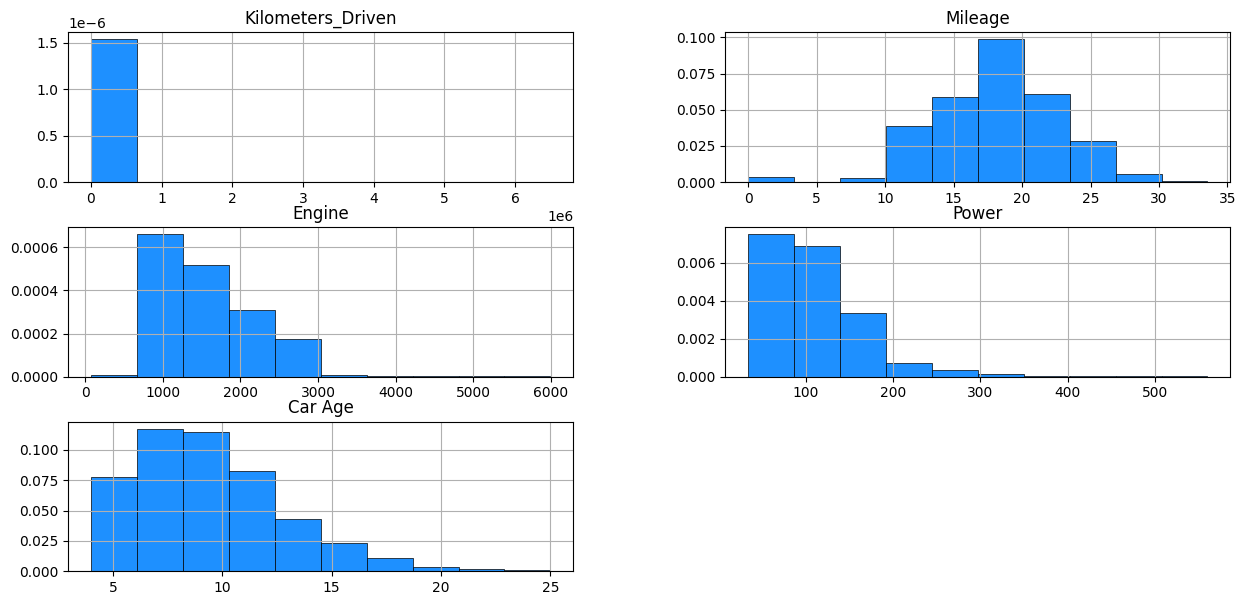

In [58]:
df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car Age']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

In [59]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car Age']
for column in train_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', df[column].skew())

Skewness of Kilometers_Driven before outlier treatment:  58.72466188582937
Skewness of Mileage before outlier treatment:  -0.4312109036256401
Skewness of Engine before outlier treatment:  1.4210000241930125
Skewness of Power before outlier treatment:  1.9561321979386848
Skewness of Car Age before outlier treatment:  0.8458021355295817


We need to treat the outlier in the Kilometers Driven Column

In [60]:
df['Kilometers_Driven'][df['Kilometers_Driven']==df['Kilometers_Driven'].max()]=sorted(df['Kilometers_Driven'],reverse=True)[1]

<ipython-input-60-c317f46ee788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kilometers_Driven'][df['Kilometers_Driven']==df['Kilometers_Driven'].max()]=sorted(df['Kilometers_Driven'],reverse=True)[1]


In [61]:
df['Kilometers_Driven'].max()

775000.0

<Axes: ylabel='Frequency'>

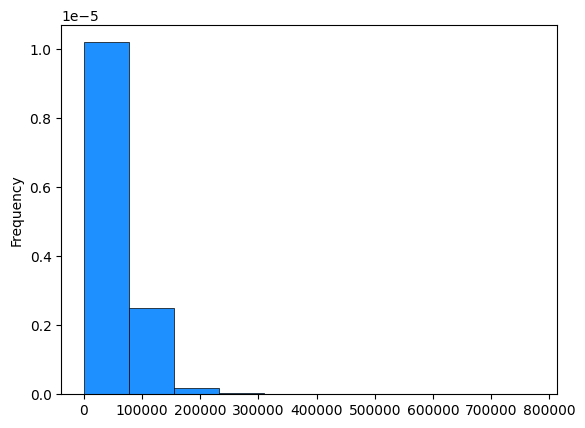

In [62]:
df['Kilometers_Driven'].plot(kind='hist',color='dodgerblue',density = True, edgecolor = 'black', linewidth = 0.5)

Using Pairplot to check trends between diffrent columns and price.

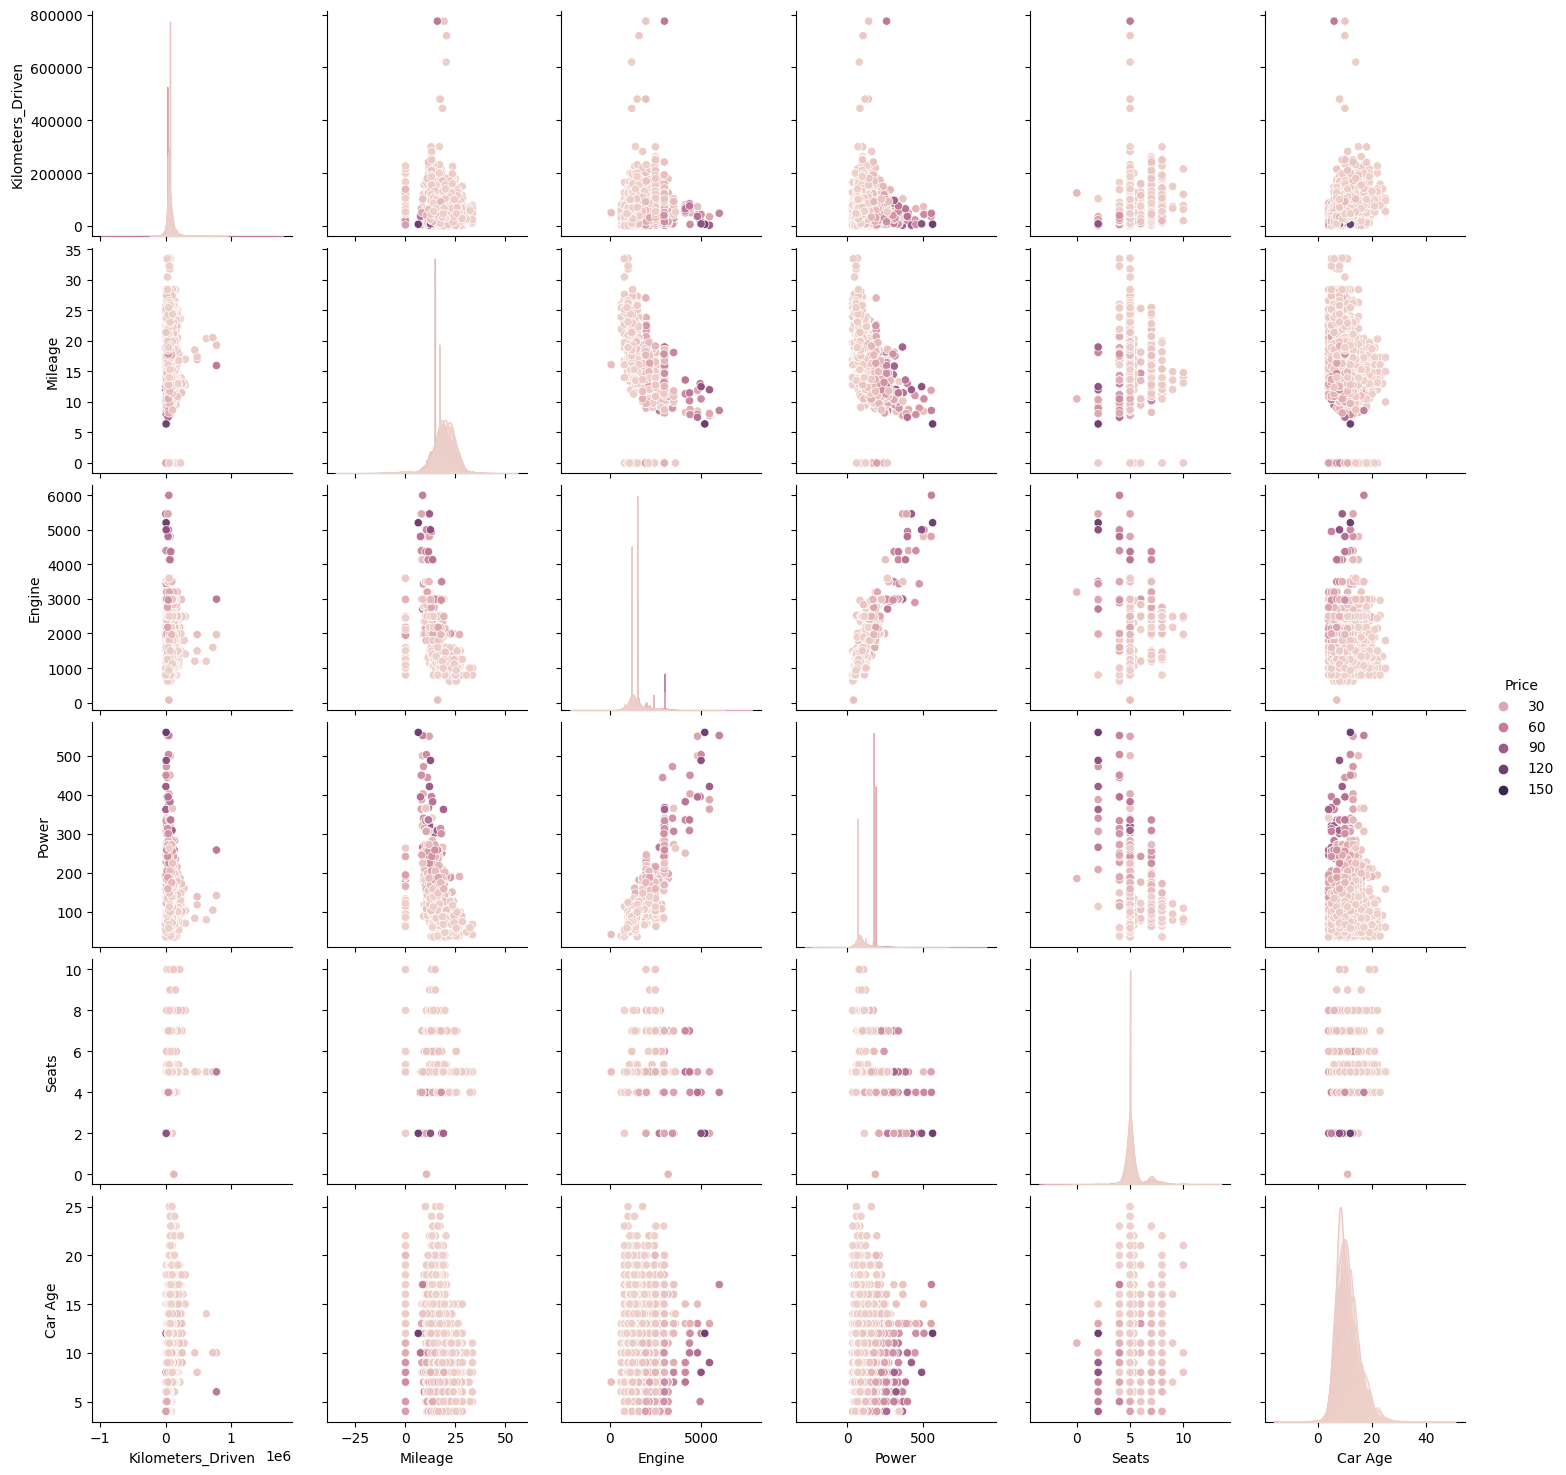

In [63]:
sns.pairplot(df,hue='Price')

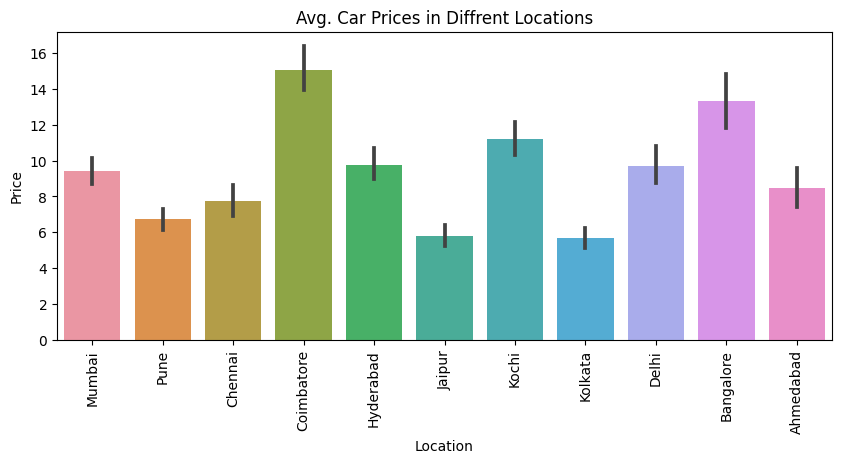

In [64]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['Location'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.title('Avg. Car Prices in Diffrent Locations')
plt.show()

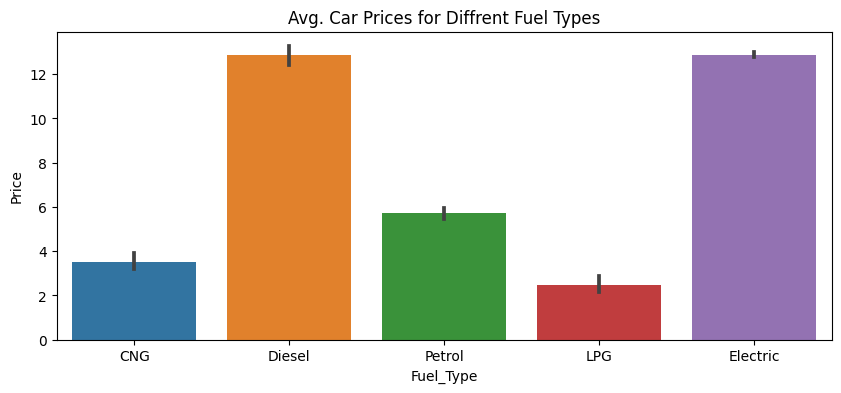

In [65]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['Fuel_Type'],y=df['Price'])
plt.title('Avg. Car Prices for Diffrent Fuel Types')
plt.show()

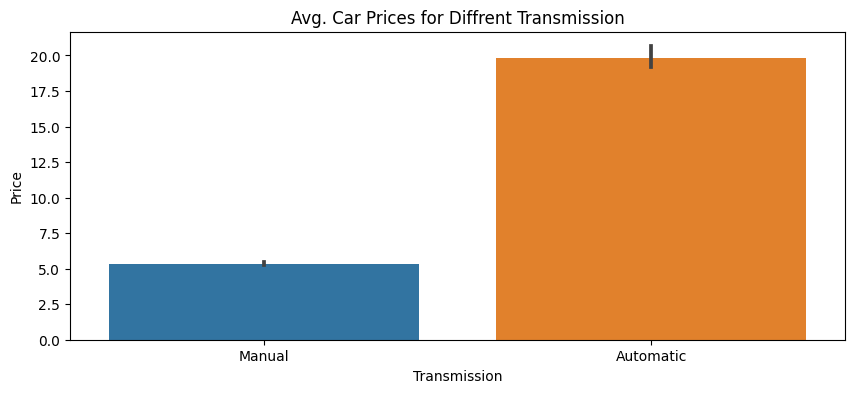

In [66]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['Transmission'],y=df['Price'])
plt.title('Avg. Car Prices for Diffrent Transmission')
plt.show()

Changing Data Type

In [67]:
categorical=df.select_dtypes(['object'])
categorical_col=categorical.columns

In [68]:
quantitative=df.select_dtypes(['int','float'])
quantitative_col=quantitative.columns

In [69]:
from sklearn.preprocessing import OrdinalEncoder


In [70]:
encoder= OrdinalEncoder()

In [71]:
categorical=encoder.fit_transform(categorical)

In [72]:
categorical=pd.DataFrame(categorical,columns=categorical_col)
categorical

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Brand Type
0,9.0,0.0,1.0,0.0,17.0,1.0
1,10.0,1.0,1.0,0.0,10.0,1.0
2,2.0,4.0,1.0,0.0,9.0,1.0
3,2.0,1.0,1.0,0.0,17.0,1.0
4,3.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...
6014,4.0,1.0,1.0,0.0,17.0,1.0
6015,6.0,1.0,1.0,0.0,10.0,1.0
6016,6.0,1.0,1.0,2.0,16.0,1.0
6017,8.0,4.0,1.0,0.0,17.0,1.0


In [73]:
quantitative=pd.DataFrame(quantitative,columns=quantitative_col)
quantitative

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car Age
0,72000.0,26.60,998.0,58.16,5.0,1.75,13
1,41000.0,19.67,1582.0,126.20,5.0,12.50,8
2,46000.0,18.20,1199.0,88.70,5.0,4.50,12
3,87000.0,20.77,1248.0,88.76,7.0,6.00,11
4,40670.0,15.20,1968.0,140.80,5.0,17.74,10
...,...,...,...,...,...,...,...
6014,27365.0,28.40,1248.0,74.00,5.0,4.75,9
6015,100000.0,24.40,1120.0,71.00,5.0,4.00,8
6016,55000.0,14.00,2498.0,112.00,8.0,2.90,11
6017,46000.0,18.90,998.0,67.10,5.0,2.65,10


In [74]:
train=pd.concat([quantitative,categorical],axis=1)

In [75]:
train.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car Age,Location,Fuel_Type,Transmission,Owner_Type,Brand,Brand Type
0,72000.0,26.60,998.0,58.16,5.0,1.75,13,9.0,0.0,1.0,0.0,17.0,1.0
1,41000.0,19.67,1582.0,126.20,5.0,12.50,8,10.0,1.0,1.0,0.0,10.0,1.0
2,46000.0,18.20,1199.0,88.70,5.0,4.50,12,2.0,4.0,1.0,0.0,9.0,1.0
3,87000.0,20.77,1248.0,88.76,7.0,6.00,11,2.0,1.0,1.0,0.0,17.0,1.0
4,40670.0,15.20,1968.0,140.80,5.0,17.74,10,3.0,1.0,0.0,2.0,1.0,0.0


In [76]:
x=train.drop('Price',axis=1)
y=df['Price']

We will Normalize the data inorder to make more precise prediction model.

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()

In [79]:
x=scaler.fit_transform(x)

In [80]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.364574,1.847879,-1.036897,-1.019610,-0.345942,1.027139,1.143658,-1.570306,0.632529,-0.463672,0.291194,0.553359
1,-0.430611,0.335258,-0.064718,0.245232,-0.345942,-0.502161,1.481989,-0.905771,0.632529,-0.463672,-0.626447,0.553359
2,-0.302356,0.014399,-0.702295,-0.451881,-0.345942,0.721279,-1.224657,1.087831,0.632529,-0.463672,-0.757539,0.553359
3,0.749341,0.575357,-0.620725,-0.450765,2.135404,0.415419,-1.224657,-0.905771,0.632529,-0.463672,0.291194,0.553359
4,-0.439076,-0.640415,0.577852,0.516641,-0.345942,0.109559,-0.886327,-0.905771,-1.580955,1.980149,-1.806272,-1.807144
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,-0.780365,2.240767,-0.620725,-0.725149,-0.345942,-0.196301,-0.547996,-0.905771,0.632529,-0.463672,0.291194,0.553359
6015,1.082806,1.367682,-0.833805,-0.780918,-0.345942,-0.502161,0.128666,-0.905771,0.632529,-0.463672,-0.626447,0.553359
6016,-0.071495,-0.902340,1.460137,-0.018741,3.376077,0.415419,0.128666,-0.905771,0.632529,1.980149,0.160102,0.553359
6017,-0.302356,0.167189,-1.036897,-0.853418,-0.345942,0.109559,0.805327,1.087831,0.632529,-0.463672,0.291194,0.553359


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Importing the neccesary liabraries needed to us from Sci-Kit Learn.

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [83]:
regression_models = [AdaBoostRegressor(),
                     GradientBoostingRegressor(),
                     XGBRegressor(),
                     LGBMRegressor(),
                     LinearRegression(),
                     RandomForestRegressor(),
                     KNeighborsRegressor(),
                     SVR()]

Creating Fucntion to check scores from diffrent regression algorithms and select best from them.

In [84]:
def reg(i,x_train,y_train,x_test,y_test):
    reg=i
    reg.fit(x_train,y_train)
    pred=reg.predict(x_test)
    print('='*35)
    print(i)
    print('-'*35)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    print('R2 Score',r2)
    print('Mean Squared Error',mse)
    print('RSME',math.sqrt(mse))
    print('-'*35)
    print('='*35)

In [85]:
for i in regression_models:
  reg(i,x_train,y_train,x_test,y_test)

AdaBoostRegressor()
-----------------------------------
R2 Score 0.6532884852628882
Mean Squared Error 42.645053804864155
RSME 6.530318047757257
-----------------------------------
GradientBoostingRegressor()
-----------------------------------
R2 Score 0.885444315923182
Mean Squared Error 14.090196325937065
RSME 3.7536910269675987
-----------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
          

As we can se the LGBMregressor gives us close result to the test data,

hence we will be moving forward with LGBMregressor.

In [86]:
model=LGBMRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 4213, number of used features: 12
[LightGBM] [Info] Start training from score 9.466622


In [87]:
print(r2_score(y_test,pred))

0.9044758639459263


# Predicting prices using Model.

Using our model to predict prices of new vehicles in our inventory.

In [126]:
test=pd.read_csv('/content/test-data.csv')
test=test.drop('Unnamed: 0',axis=1)
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


Prepairing Data to be make it model fit.

Fiixng Mileage Values



In [127]:
test['Mileage']=test['Mileage'].str.rstrip('kmpl')

In [128]:
test['Mileage']=test['Mileage'].str.rstrip('km/kg')

In [129]:
test['Mileage']=test['Mileage'].astype(float)

Fixing Engine Values

In [130]:
test['Engine']=test['Engine'].str.rstrip('CC')

In [131]:
test['Engine']=test['Engine'].replace(regex='null',value=np.nan)

In [132]:
test['Engine']=test['Engine'].astype(float)

Fixing Power Values

In [133]:
test['Power']=test['Power'].str.rstrip('bhp')

In [134]:
test['Power']=test['Power'].replace(regex='null',value=np.nan)

In [135]:
test['Power']=test['Power'].astype(float)

Extracting Brand Name from Name

In [136]:
test['Name']=test['Name'].apply(lambda x:x.split()[0])

Extracting Age of Car.

In [137]:
test['Car Age']=2023-test['Year']

Defining Brand Value using the brand name

In [138]:
Low_value = ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Tata', 'Mitsubishi', 'Renault', 'Mahindra', 'Ford',
             'Datsun', 'Chevrolet', 'Skoda', 'Fiat', 'Smart', 'Ambassador', 'Isuzu', 'Force']
High_value = ['Audi', 'Nissan', 'Volkswagen', 'Land Rover', 'Mercedes-Benz', 'BMW', 'Porsche',
              'Jaguar', 'Volvo', 'Mini Cooper','Jeep', 'Bentley', 'Lamborghini']

test['Brand Type']=test['Name'].apply(lambda x:'Low Value' if x in Low_value else 'High Value')

Removing columns with less importance in price prediction.

In [139]:
test=test.drop(['Year','New_Price'],axis=1)

Encoding Categorical Values to make it prediction fit

In [140]:
categorical_test=test.select_dtypes(['object'])
categorical_col=categorical_test.columns
categorical_test=pd.DataFrame(categorical_test,columns=categorical_col)

In [141]:
quantitative_test=test.select_dtypes(['float','int'])
quantitative_col=quantitative_test.columns
quantitative_test=pd.DataFrame(quantitative_test,columns=quantitative_col)

In [142]:
categorical_test

,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand Type
0,Maruti,Delhi,CNG,Manual,First,Low Value
1,Maruti,Coimbatore,Petrol,Manual,Second,Low Value
2,Toyota,Mumbai,Diesel,Manual,First,Low Value
3,Toyota,Hyderabad,Diesel,Manual,First,Low Value
4,Hyundai,Mumbai,Petrol,Manual,First,Low Value
...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,Diesel,Manual,First,High Value
1230,Volkswagen,Mumbai,Petrol,Automatic,First,High Value
1231,Nissan,Kolkata,Diesel,Manual,First,High Value
1232,Volkswagen,Pune,Petrol,Automatic,Third,High Value


In [143]:
categorical_test=pd.DataFrame(encoder.fit_transform(categorical_test),columns=categorical_col)

In [144]:
test=pd.concat([quantitative_test,categorical_test],axis=1)

In [145]:
test.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car Age,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand Type
0,40929,32.26,998.0,58.20,4.0,9,16.0,4.0,0.0,1.0,0.0,1.0
1,54493,24.70,796.0,47.30,5.0,10,16.0,3.0,3.0,1.0,2.0,1.0
2,34000,13.68,2393.0,147.80,7.0,6,26.0,9.0,1.0,1.0,0.0,1.0
3,139000,23.59,1364.0,NaN,5.0,11,26.0,5.0,1.0,1.0,0.0,1.0
4,29000,18.50,1197.0,82.85,5.0,9,9.0,9.0,3.0,1.0,0.0,1.0


In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  1234 non-null   int64  
 1   Mileage            1234 non-null   float64
 2   Engine             1224 non-null   float64
 3   Power              1202 non-null   float64
 4   Seats              1223 non-null   float64
 5   Car Age            1234 non-null   int64  
 6   Name               1234 non-null   float64
 7   Location           1234 non-null   float64
 8   Fuel_Type          1234 non-null   float64
 9   Transmission       1234 non-null   float64
 10  Owner_Type         1234 non-null   float64
 11  Brand Type         1234 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 115.8 KB


In [147]:
test.nunique()

Kilometers_Driven    755
Mileage              298
Engine               104
Power                247
Seats                  7
Car Age               20
Name                  29
Location              11
Fuel_Type              4
Transmission           2
Owner_Type             4
Brand Type             2
dtype: int64

Normalizing the processed data

In [148]:
test=scaler.fit_transform(test)

Predicting Prices of the new cars.

In [149]:
price_test=model.predict(test)

Putting together the predicted price infront of the values it has been predicted on.

In [164]:
price_test=pd.DataFrame(price_test)

In [174]:
test=pd.read_csv('/content/test-data.csv')
test=test.drop('Unnamed: 0',axis=1)

In [175]:
predicted_price=pd.concat([test,price_test],axis=1)

In [177]:
predicted_price.head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,0
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.040547
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.352213
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,21.482175
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,5.394035
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,4.351436
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,18.781644
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN,13.372797
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,2.161066
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,4.656898
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,14.095082


Now feeding a random value to check the prediction upon.

In [152]:
pk=[40000,13,1300,92,4,7,'Maruti','Delhi','Petrol','Manual','First','Low Value']

In [153]:
pk=pd.DataFrame(pk)
pk=pk.T
pk

,0,1,2,3,4,5,6,7,8,9,10,11
0,40000,13,1300,92,4,7,Maruti,Delhi,Petrol,Manual,First,Low Value


In [154]:
pk['Kilometers_Driven']=pk[0].astype(int)
pk['Mileage']=pk[1].astype(int)
pk['Engine']=pk[2].astype(int)
pk['Power']=pk[3].astype(int)
pk['Seats']=pk[4].astype(int)
pk['Car Age']=pk[5].astype(int)
pk['Name']=pk[6].astype('category')
pk['Location']=pk[7].astype('category')
pk['Fuel_Type']=pk[8].astype('category')
pk['Transmission']=pk[9].astype('category')
pk['Owner_Type']=pk[10].astype('category')
pk['Brand Type']=pk[11].astype('category')

In [155]:
pk=pk.drop([0,1,2,3,4,5,6,7,8,9,10,11],axis=1)
pk

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car Age,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand Type
0,40000,13,1300,92,4,7,Maruti,Delhi,Petrol,Manual,First,Low Value


In [156]:
pk_cat=pk.select_dtypes(['category'])
pk_col=pk_cat.columns
pk_cat=pd.DataFrame(encoder.transform(pk_cat),columns=pk_col)
pk_cat

,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand Type
0,16.0,4.0,3.0,1.0,0.0,1.0


In [157]:
pk=pk.select_dtypes(['int','float'])
pk

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car Age
0,40000,13,1300,92,4,7


In [158]:
pk.dtypes

Kilometers_Driven    int64
Mileage              int64
Engine               int64
Power                int64
Seats                int64
Car Age              int64
dtype: object

In [159]:
pk=pd.concat([pk,pk_cat],axis=1)

In [160]:
pk=scaler.transform(pk)

In [161]:
pk_price=model.predict(pk)

In [162]:
pk_price

array([8.05442546])

Allthough the model is predicting price which are approximately correct.

Feeding in more values in the training data and attributes will help more to make this model accurate and reliable.